In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from itertools import product
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pmdarima.arima import ndiffs
from pmdarima.arima import CHTest
from pmdarima.arima import OCSBTest
from math import sqrt
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



#MLP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
from datetime import datetime
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import keras
import warnings
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from numpy import array
%matplotlib inline


#https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/

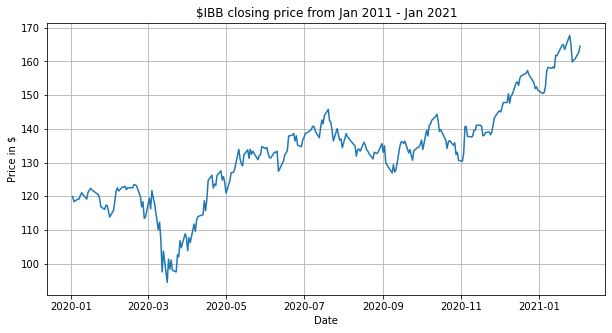

In [45]:
#def parser(x):
#    return datetime.strptime(x, "%Y-%m-%d")
#
#Explain tables properties




def read_data(filename):
    data = pd.read_csv(filename, usecols=[0,4], parse_dates=[0], header=0)
    plt.figure(figsize=[10, 5]); # Set dimensions for figure
    plt.plot(data['Date'], data['Close'])
    plt.title('$IBB closing price from Jan 2011 - Jan 2021')
    plt.ylabel('Price in $')
    plt.xlabel('Date')
    #plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    return data
    
    
data = read_data('IBBmonth.csv')    

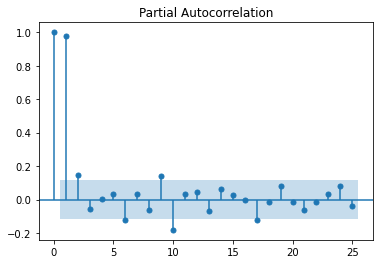

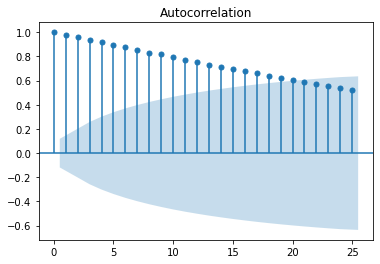

In [46]:
#Autocorrelation and Partial autocorrelation

plot_pacf(data['Close'])
plot_acf(data['Close'])
plt.show()

In [47]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data['Close'])

(0.5429315572734453, True)

In [48]:
#Split dataset

def split_data(training_size):
    if training_size < 0 or training_size > 1:
        raise ValueError("Pease use a value between 0 and 1 to split the dataset. Recommended values for the size of the training dataset are: 0.50, 0.67, 0.80.")
    train_data, test_data = data[0:int(len(data)*training_size)], data[int(len(data)*training_size):]
    
    train_data = train_data['Close'].values
    test_data = test_data['Close'].values
    
    print("Number of training samples:", len(train_data))
    print("Number of testing samples:", len(test_data))
    return training_size, train_data, test_data
    
    
split_ratio, train_data, test_data = split_data(0.67)

Number of training samples: 183
Number of testing samples: 91


In [49]:
kpss_diffs = ndiffs(train_data, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train_data, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")




Estimated differencing term: 1


In [50]:
arima_model_test =  auto_arima(train_data,start_p=0, d=n_diffs, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, seasonal_test='ocsb', error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20, n_fits = 50)


print(arima_model_test)
print(arima_model_test.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=877.706, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=865.102, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=868.316, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=875.856, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=865.138, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=865.880, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=866.875, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=863.372, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=863.347, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=864.721, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=865.067, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=864.122, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=858.165, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=859.347, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=854.2

In [51]:
# Ljung-Box test
#ljung_box, p_value = acorr_ljungbox(arima_model.resid)
#print(f'Ljung-Box test: {ljung_box[:10]}')
#print(f'p-value: {p_value[:10]}')

In [52]:
history = [x for x in train_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=arima_model_test.order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)




In [53]:
def calculate_error_measures(X, Y):
        
    MSE = mean_squared_error(X, Y)
    print('Mean Squared Error: {}'.format(MSE))
    
    MAE = mean_absolute_error(X, Y)
    print('Mean Absolute Error: {}'.format(MAE))
    
    error_measures = [MSE, MAE]
    print(error_measures)
    return error_measures
    

print("Error measures for ARIMA:")
calculate_error_measures(test_data, model_predictions)

Error measures for ARIMA:
Mean Squared Error: 4.607402467038995
Mean Absolute Error: 1.6152348068395936
[4.607402467038995, 1.6152348068395936]


[4.607402467038995, 1.6152348068395936]

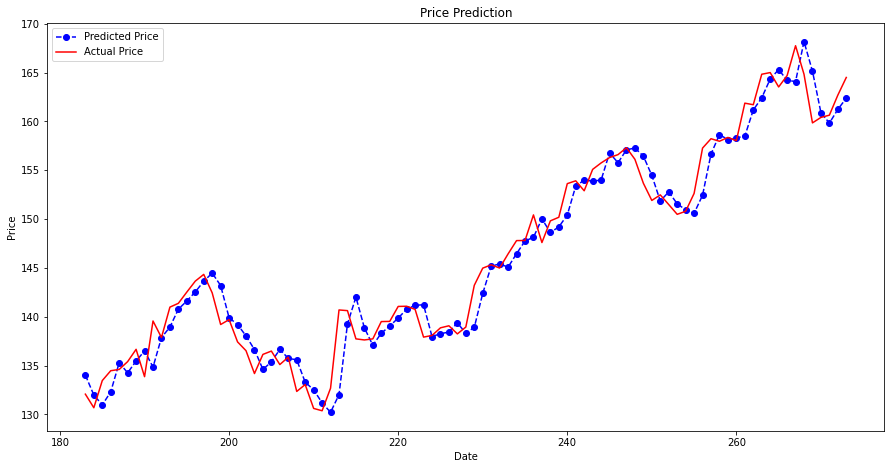

In [54]:
test_set_range = data[int(len(data)*split_ratio):].index
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
#temp MLP

In [56]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [57]:
#Split test and train dataset

#
#train_data, test_data = train_test_split(data, test_size=0.33, shuffle = False, stratify = None)
#
#
#print(train_data.head())
#print(train_data.tail())
#print(test_data.head())
#print(train_data)
#
#test_data = test_data.reset_index(drop=True)
#train_data = test_data.reset_index(drop=True)

In [58]:
# define input sequence
raw_seq = train_data
print(raw_seq)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

#print(X,y)

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

# fit model
model.fit(X, y, epochs=2000, verbose=1)
# demonstrate prediction

#temp = train_data['Close']
#x_input, y_output = split_sequence(temp, n_steps)
#x_input = x_input[]
#x_input = x_input.values.reshape(n_steps, (n_steps:len(x_input)))


#x_input = test_data['Close']





x_input = test_data
x_input = x_input[:-1]
x_shape = x_input.shape[0]
x_input = x_input.reshape((30, n_steps))


yhat = model.predict(x_input, verbose=1)

print(yhat)


#predictions = pd.DataFrame.from_records(yhat, columns='predicted')
#predictions = predictions.reset_index(drop=True)


#actual = data[n_steps:len(data)]
#actual = actual.reset_index(drop=True)




[119.889999 118.360001 119.120003 119.150002 120.220001 121.040001
 120.449997 119.160004 121.110001 121.730003 122.349998 121.889999
 120.720001 120.459999 119.5      116.879997 116.089996 117.32
 117.239998 115.540001 113.809998 115.82     118.550003 121.559998
 122.470001 121.529999 122.730003 122.669998 122.940002 121.949997
 122.470001 122.519997 123.480003 123.309998 123.080002 119.839996
 116.800003 118.360001 113.43     113.879997 119.419998 116.230003
 121.68     119.559998 118.029999 110.       112.309998 106.970001
  97.5      103.68      94.389999 101.300003  98.330002 101.059998
  98.040001  97.5      102.620003 102.       106.790001 104.709999
 108.839996 107.739998 103.790001 107.699997 106.25     111.709999
 109.540001 112.940002 113.970001 114.489998 118.650002 115.690002
 119.080002 124.639999 126.25     122.419998 123.580002 123.199997
 126.18     127.529999 124.809998 125.800003 124.       120.900002
 124.550003 126.980003 127.       127.169998 128.410004 133.899994

6/6 [==============================] - 0s 500us/step - loss: 8.0109
Epoch 63/2000
6/6 [==============================] - 0s 333us/step - loss: 7.8514
Epoch 64/2000
6/6 [==============================] - 0s 500us/step - loss: 7.8833
Epoch 65/2000
6/6 [==============================] - 0s 333us/step - loss: 7.8536
Epoch 66/2000
6/6 [==============================] - 0s 334us/step - loss: 7.7997
Epoch 67/2000
6/6 [==============================] - 0s 500us/step - loss: 7.7403
Epoch 68/2000
6/6 [==============================] - 0s 500us/step - loss: 8.1422
Epoch 69/2000
6/6 [==============================] - 0s 333us/step - loss: 7.7699
Epoch 70/2000
6/6 [==============================] - 0s 500us/step - loss: 7.8769
Epoch 71/2000
6/6 [==============================] - 0s 500us/step - loss: 7.7979
Epoch 72/2000
6/6 [==============================] - 0s 333us/step - loss: 7.7395
Epoch 73/2000
6/6 [==============================] - 0s 333us/step - loss: 7.8142
Epoch 74/2000
6/6 [===========

6/6 [==============================] - 0s 334us/step - loss: 7.8358
Epoch 162/2000
6/6 [==============================] - 0s 501us/step - loss: 7.5037
Epoch 163/2000
6/6 [==============================] - 0s 333us/step - loss: 7.6362
Epoch 164/2000
6/6 [==============================] - 0s 500us/step - loss: 7.8882
Epoch 165/2000
6/6 [==============================] - 0s 333us/step - loss: 7.5758
Epoch 166/2000
6/6 [==============================] - 0s 333us/step - loss: 7.3682
Epoch 167/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2912
Epoch 168/2000
6/6 [==============================] - 0s 334us/step - loss: 7.2746
Epoch 169/2000
6/6 [==============================] - 0s 333us/step - loss: 7.3341
Epoch 170/2000
6/6 [==============================] - 0s 333us/step - loss: 7.5461
Epoch 171/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2887
Epoch 172/2000
6/6 [==============================] - 0s 333us/step - loss: 7.3290
Epoch 173/2000
6/6 

6/6 [==============================] - 0s 333us/step - loss: 7.1545
Epoch 260/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2686
Epoch 261/2000
6/6 [==============================] - 0s 500us/step - loss: 7.5350
Epoch 262/2000
6/6 [==============================] - 0s 334us/step - loss: 8.3492
Epoch 263/2000
6/6 [==============================] - 0s 500us/step - loss: 8.1863
Epoch 264/2000
6/6 [==============================] - 0s 500us/step - loss: 7.7151
Epoch 265/2000
6/6 [==============================] - 0s 334us/step - loss: 8.1279
Epoch 266/2000
6/6 [==============================] - 0s 500us/step - loss: 7.3072
Epoch 267/2000
6/6 [==============================] - 0s 500us/step - loss: 7.1430
Epoch 268/2000
6/6 [==============================] - 0s 333us/step - loss: 7.1575
Epoch 269/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8355
Epoch 270/2000
6/6 [==============================] - 0s 500us/step - loss: 6.9013
Epoch 271/2000
6/6 

6/6 [==============================] - 0s 333us/step - loss: 6.8869
Epoch 358/2000
6/6 [==============================] - 0s 500us/step - loss: 6.6584
Epoch 359/2000
6/6 [==============================] - 0s 333us/step - loss: 9.1256
Epoch 360/2000
6/6 [==============================] - 0s 500us/step - loss: 8.1358
Epoch 361/2000
6/6 [==============================] - 0s 333us/step - loss: 7.7023
Epoch 362/2000
6/6 [==============================] - 0s 500us/step - loss: 7.0646
Epoch 363/2000
6/6 [==============================] - 0s 333us/step - loss: 7.2391
Epoch 364/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7364
Epoch 365/2000
6/6 [==============================] - 0s 333us/step - loss: 7.1463
Epoch 366/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7825
Epoch 367/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7663
Epoch 368/2000
6/6 [==============================] - 0s 333us/step - loss: 7.0300
Epoch 369/2000
6/6 

6/6 [==============================] - 0s 500us/step - loss: 7.6005
Epoch 456/2000
6/6 [==============================] - 0s 333us/step - loss: 6.8755
Epoch 457/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8752
Epoch 458/2000
6/6 [==============================] - 0s 333us/step - loss: 8.4639
Epoch 459/2000
6/6 [==============================] - 0s 500us/step - loss: 9.0717
Epoch 460/2000
6/6 [==============================] - 0s 333us/step - loss: 9.4213
Epoch 461/2000
6/6 [==============================] - 0s 500us/step - loss: 9.1381
Epoch 462/2000
6/6 [==============================] - 0s 500us/step - loss: 8.8600
Epoch 463/2000
6/6 [==============================] - 0s 333us/step - loss: 9.3108
Epoch 464/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2999
Epoch 465/2000
6/6 [==============================] - 0s 333us/step - loss: 7.0683
Epoch 466/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7122
Epoch 467/2000
6/6 

6/6 [==============================] - 0s 500us/step - loss: 6.8017
Epoch 554/2000
6/6 [==============================] - 0s 500us/step - loss: 7.1560
Epoch 555/2000
6/6 [==============================] - 0s 332us/step - loss: 6.9212
Epoch 556/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7519
Epoch 557/2000
6/6 [==============================] - 0s 333us/step - loss: 6.8893
Epoch 558/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8827
Epoch 559/2000
6/6 [==============================] - 0s 333us/step - loss: 6.8487
Epoch 560/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8217
Epoch 561/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8951
Epoch 562/2000
6/6 [==============================] - 0s 333us/step - loss: 6.5459
Epoch 563/2000
6/6 [==============================] - 0s 500us/step - loss: 7.1403
Epoch 564/2000
6/6 [==============================] - 0s 333us/step - loss: 6.8360
Epoch 565/2000
6/6 

6/6 [==============================] - 0s 500us/step - loss: 9.4350
Epoch 652/2000
6/6 [==============================] - 0s 333us/step - loss: 8.6857
Epoch 653/2000
6/6 [==============================] - 0s 334us/step - loss: 7.8041
Epoch 654/2000
6/6 [==============================] - 0s 500us/step - loss: 7.4709
Epoch 655/2000
6/6 [==============================] - 0s 333us/step - loss: 9.5638
Epoch 656/2000
6/6 [==============================] - 0s 667us/step - loss: 7.2101
Epoch 657/2000
6/6 [==============================] - 0s 333us/step - loss: 7.7253
Epoch 658/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7403
Epoch 659/2000
6/6 [==============================] - 0s 333us/step - loss: 6.9189
Epoch 660/2000
6/6 [==============================] - 0s 333us/step - loss: 9.9923
Epoch 661/2000
6/6 [==============================] - 0s 500us/step - loss: 9.4163
Epoch 662/2000
6/6 [==============================] - 0s 501us/step - loss: 8.6811
Epoch 663/2000
6/6 

6/6 [==============================] - 0s 500us/step - loss: 6.8018
Epoch 750/2000
6/6 [==============================] - 0s 333us/step - loss: 6.9480
Epoch 751/2000
6/6 [==============================] - 0s 333us/step - loss: 7.4987
Epoch 752/2000
6/6 [==============================] - 0s 333us/step - loss: 6.8272
Epoch 753/2000
6/6 [==============================] - 0s 333us/step - loss: 7.0711
Epoch 754/2000
6/6 [==============================] - 0s 500us/step - loss: 7.7190
Epoch 755/2000
6/6 [==============================] - 0s 333us/step - loss: 8.5619
Epoch 756/2000
6/6 [==============================] - 0s 500us/step - loss: 7.7295
Epoch 757/2000
6/6 [==============================] - 0s 333us/step - loss: 9.2307
Epoch 758/2000
6/6 [==============================] - 0s 500us/step - loss: 10.9832
Epoch 759/2000
6/6 [==============================] - 0s 333us/step - loss: 9.9585
Epoch 760/2000
6/6 [==============================] - 0s 500us/step - loss: 8.8834
Epoch 761/2000
6/6

6/6 [==============================] - 0s 333us/step - loss: 9.1895
Epoch 848/2000
6/6 [==============================] - 0s 500us/step - loss: 7.1481
Epoch 849/2000
6/6 [==============================] - 0s 333us/step - loss: 7.5618
Epoch 850/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7928
Epoch 851/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7659
Epoch 852/2000
6/6 [==============================] - 0s 500us/step - loss: 6.6650
Epoch 853/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7231
Epoch 854/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7810
Epoch 855/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7783
Epoch 856/2000
6/6 [==============================] - 0s 334us/step - loss: 7.0338
Epoch 857/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2979
Epoch 858/2000
6/6 [==============================] - 0s 333us/step - loss: 8.8847
Epoch 859/2000
6/6 

6/6 [==============================] - 0s 333us/step - loss: 9.5347
Epoch 946/2000
6/6 [==============================] - 0s 333us/step - loss: 7.2217
Epoch 947/2000
6/6 [==============================] - 0s 500us/step - loss: 7.8124
Epoch 948/2000
6/6 [==============================] - 0s 333us/step - loss: 7.7845
Epoch 949/2000
6/6 [==============================] - 0s 500us/step - loss: 9.5303
Epoch 950/2000
6/6 [==============================] - 0s 333us/step - loss: 9.6363
Epoch 951/2000
6/6 [==============================] - 0s 500us/step - loss: 8.6048
Epoch 952/2000
6/6 [==============================] - 0s 333us/step - loss: 7.7487
Epoch 953/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2590
Epoch 954/2000
6/6 [==============================] - 0s 333us/step - loss: 8.2981
Epoch 955/2000
6/6 [==============================] - 0s 334us/step - loss: 8.1284
Epoch 956/2000
6/6 [==============================] - 0s 500us/step - loss: 10.9478
Epoch 957/2000
6/6

6/6 [==============================] - 0s 500us/step - loss: 7.0643
Epoch 1044/2000
6/6 [==============================] - 0s 334us/step - loss: 7.1604
Epoch 1045/2000
6/6 [==============================] - 0s 333us/step - loss: 6.8107
Epoch 1046/2000
6/6 [==============================] - 0s 333us/step - loss: 6.5991
Epoch 1047/2000
6/6 [==============================] - 0s 333us/step - loss: 6.6086
Epoch 1048/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7017
Epoch 1049/2000
6/6 [==============================] - 0s 333us/step - loss: 8.0708
Epoch 1050/2000
6/6 [==============================] - 0s 500us/step - loss: 8.1329
Epoch 1051/2000
6/6 [==============================] - 0s 333us/step - loss: 7.8456
Epoch 1052/2000
6/6 [==============================] - 0s 500us/step - loss: 7.1341
Epoch 1053/2000
6/6 [==============================] - 0s 334us/step - loss: 8.3014
Epoch 1054/2000
6/6 [==============================] - 0s 334us/step - loss: 6.6838
Epoch 10

6/6 [==============================] - 0s 500us/step - loss: 7.5353
Epoch 1141/2000
6/6 [==============================] - 0s 500us/step - loss: 6.9900
Epoch 1142/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7910
Epoch 1143/2000
6/6 [==============================] - 0s 500us/step - loss: 7.0220
Epoch 1144/2000
6/6 [==============================] - 0s 333us/step - loss: 8.6336
Epoch 1145/2000
6/6 [==============================] - 0s 500us/step - loss: 8.0224
Epoch 1146/2000
6/6 [==============================] - 0s 500us/step - loss: 8.3266
Epoch 1147/2000
6/6 [==============================] - 0s 333us/step - loss: 9.2911
Epoch 1148/2000
6/6 [==============================] - 0s 500us/step - loss: 10.0669
Epoch 1149/2000
6/6 [==============================] - 0s 500us/step - loss: 8.7719
Epoch 1150/2000
6/6 [==============================] - 0s 333us/step - loss: 8.6842
Epoch 1151/2000
6/6 [==============================] - 0s 333us/step - loss: 7.0266
Epoch 1

6/6 [==============================] - 0s 500us/step - loss: 7.5564
Epoch 1238/2000
6/6 [==============================] - 0s 500us/step - loss: 8.5640
Epoch 1239/2000
6/6 [==============================] - 0s 333us/step - loss: 6.8372
Epoch 1240/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7103
Epoch 1241/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8532
Epoch 1242/2000
6/6 [==============================] - 0s 334us/step - loss: 7.6840
Epoch 1243/2000
6/6 [==============================] - 0s 500us/step - loss: 8.1867
Epoch 1244/2000
6/6 [==============================] - 0s 333us/step - loss: 6.4980
Epoch 1245/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8824
Epoch 1246/2000
6/6 [==============================] - 0s 333us/step - loss: 6.5950
Epoch 1247/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8360
Epoch 1248/2000
6/6 [==============================] - 0s 333us/step - loss: 7.4083
Epoch 12

6/6 [==============================] - 0s 500us/step - loss: 7.7329
Epoch 1335/2000
6/6 [==============================] - 0s 333us/step - loss: 7.4494
Epoch 1336/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2903
Epoch 1337/2000
6/6 [==============================] - 0s 333us/step - loss: 8.0427
Epoch 1338/2000
6/6 [==============================] - 0s 500us/step - loss: 7.5455
Epoch 1339/2000
6/6 [==============================] - 0s 333us/step - loss: 7.1812
Epoch 1340/2000
6/6 [==============================] - 0s 500us/step - loss: 6.6363
Epoch 1341/2000
6/6 [==============================] - 0s 333us/step - loss: 6.6387
Epoch 1342/2000
6/6 [==============================] - 0s 500us/step - loss: 6.6322
Epoch 1343/2000
6/6 [==============================] - 0s 333us/step - loss: 7.2053
Epoch 1344/2000
6/6 [==============================] - 0s 500us/step - loss: 8.3775
Epoch 1345/2000
6/6 [==============================] - 0s 500us/step - loss: 8.1317
Epoch 13

6/6 [==============================] - 0s 500us/step - loss: 6.7912
Epoch 1432/2000
6/6 [==============================] - 0s 500us/step - loss: 8.2902
Epoch 1433/2000
6/6 [==============================] - 0s 333us/step - loss: 8.1770
Epoch 1434/2000
6/6 [==============================] - 0s 500us/step - loss: 6.9875
Epoch 1435/2000
6/6 [==============================] - 0s 333us/step - loss: 7.2193
Epoch 1436/2000
6/6 [==============================] - 0s 334us/step - loss: 6.8074
Epoch 1437/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8766
Epoch 1438/2000
6/6 [==============================] - 0s 333us/step - loss: 7.5742
Epoch 1439/2000
6/6 [==============================] - 0s 500us/step - loss: 9.2614
Epoch 1440/2000
6/6 [==============================] - 0s 333us/step - loss: 8.7640
Epoch 1441/2000
6/6 [==============================] - 0s 500us/step - loss: 9.2413
Epoch 1442/2000
6/6 [==============================] - 0s 333us/step - loss: 9.1503
Epoch 14

6/6 [==============================] - 0s 333us/step - loss: 6.6660
Epoch 1529/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7011
Epoch 1530/2000
6/6 [==============================] - 0s 333us/step - loss: 6.6957
Epoch 1531/2000
6/6 [==============================] - 0s 500us/step - loss: 6.6442
Epoch 1532/2000
6/6 [==============================] - 0s 333us/step - loss: 8.5378
Epoch 1533/2000
6/6 [==============================] - 0s 500us/step - loss: 9.1245
Epoch 1534/2000
6/6 [==============================] - 0s 333us/step - loss: 7.5148
Epoch 1535/2000
6/6 [==============================] - 0s 333us/step - loss: 6.6750
Epoch 1536/2000
6/6 [==============================] - 0s 500us/step - loss: 7.4261
Epoch 1537/2000
6/6 [==============================] - 0s 333us/step - loss: 7.3063
Epoch 1538/2000
6/6 [==============================] - 0s 500us/step - loss: 7.1339
Epoch 1539/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7510
Epoch 15

6/6 [==============================] - 0s 333us/step - loss: 6.7568
Epoch 1626/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7300
Epoch 1627/2000
6/6 [==============================] - 0s 333us/step - loss: 7.5563
Epoch 1628/2000
6/6 [==============================] - 0s 334us/step - loss: 6.5695
Epoch 1629/2000
6/6 [==============================] - 0s 333us/step - loss: 7.0383
Epoch 1630/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2584
Epoch 1631/2000
6/6 [==============================] - 0s 333us/step - loss: 6.9079
Epoch 1632/2000
6/6 [==============================] - 0s 333us/step - loss: 7.7861
Epoch 1633/2000
6/6 [==============================] - 0s 500us/step - loss: 6.6910
Epoch 1634/2000
6/6 [==============================] - 0s 335us/step - loss: 7.9473
Epoch 1635/2000
6/6 [==============================] - 0s 500us/step - loss: 8.0520
Epoch 1636/2000
6/6 [==============================] - 0s 333us/step - loss: 10.5190
Epoch 1

6/6 [==============================] - 0s 500us/step - loss: 7.0330
Epoch 1723/2000
6/6 [==============================] - 0s 500us/step - loss: 7.9109
Epoch 1724/2000
6/6 [==============================] - 0s 333us/step - loss: 6.8156
Epoch 1725/2000
6/6 [==============================] - 0s 500us/step - loss: 6.9435
Epoch 1726/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2206
Epoch 1727/2000
6/6 [==============================] - 0s 333us/step - loss: 7.8033
Epoch 1728/2000
6/6 [==============================] - 0s 500us/step - loss: 6.9295
Epoch 1729/2000
6/6 [==============================] - 0s 333us/step - loss: 6.5887
Epoch 1730/2000
6/6 [==============================] - 0s 335us/step - loss: 7.0086
Epoch 1731/2000
6/6 [==============================] - 0s 500us/step - loss: 7.9974
Epoch 1732/2000
6/6 [==============================] - 0s 336us/step - loss: 7.7992
Epoch 1733/2000
6/6 [==============================] - 0s 500us/step - loss: 7.2627
Epoch 17

6/6 [==============================] - 0s 500us/step - loss: 12.8753
Epoch 1820/2000
6/6 [==============================] - 0s 333us/step - loss: 8.6402
Epoch 1821/2000
6/6 [==============================] - 0s 500us/step - loss: 7.4482
Epoch 1822/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7063
Epoch 1823/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7350
Epoch 1824/2000
6/6 [==============================] - 0s 334us/step - loss: 6.8026
Epoch 1825/2000
6/6 [==============================] - 0s 500us/step - loss: 6.5225
Epoch 1826/2000
6/6 [==============================] - 0s 333us/step - loss: 6.5117
Epoch 1827/2000
6/6 [==============================] - 0s 500us/step - loss: 7.1734
Epoch 1828/2000
6/6 [==============================] - 0s 333us/step - loss: 6.7010
Epoch 1829/2000
6/6 [==============================] - 0s 500us/step - loss: 6.9639
Epoch 1830/2000
6/6 [==============================] - 0s 334us/step - loss: 7.5390
Epoch 1

6/6 [==============================] - 0s 333us/step - loss: 7.5097
Epoch 1917/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8881
Epoch 1918/2000
6/6 [==============================] - 0s 333us/step - loss: 7.2367
Epoch 1919/2000
6/6 [==============================] - 0s 500us/step - loss: 7.0110
Epoch 1920/2000
6/6 [==============================] - 0s 500us/step - loss: 6.8147
Epoch 1921/2000
6/6 [==============================] - 0s 333us/step - loss: 6.9291
Epoch 1922/2000
6/6 [==============================] - 0s 333us/step - loss: 6.6813
Epoch 1923/2000
6/6 [==============================] - 0s 500us/step - loss: 6.9160
Epoch 1924/2000
6/6 [==============================] - 0s 333us/step - loss: 6.6966
Epoch 1925/2000
6/6 [==============================] - 0s 500us/step - loss: 7.3675
Epoch 1926/2000
6/6 [==============================] - 0s 333us/step - loss: 7.2513
Epoch 1927/2000
6/6 [==============================] - 0s 500us/step - loss: 6.7535
Epoch 19

In [59]:
MLP_test = test_data[:-1]
MLP_test = MLP_test
MLP_test = MLP_test[::3]

MLP_MSE = mean_squared_error(MLP_test, yhat)
print('Mean Squared Error: {}'.format(MLP_MSE))

MLP_MAE = mean_absolute_error(MLP_test, yhat)
print('Mean Absolute Error: {}'.format(MLP_MAE))

MLP_error = [MLP_MSE, MLP_MAE]
print(MLP_error)

Mean Squared Error: 7.906093271100203
Mean Absolute Error: 2.060795042578124
[7.906093271100203, 2.060795042578124]


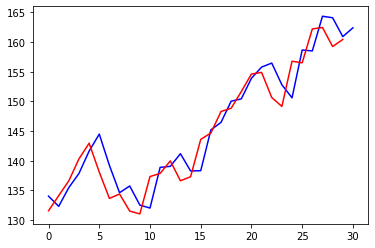

In [60]:
# MLP and REAL
y_output_3 = model_predictions[::3]
plt.plot(y_output_3, color="blue")
plt.plot(yhat, color="red")
plt.show()

In [61]:
window_size=3
moving_average = pd.Series(test_data)


numbers_series = pd.Series(test_data)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

print(without_nans)

[132.08000166666667, 132.87999966666666, 134.18666600000003, 134.83333366666668, 135.5633343333333, 135.31666566666664, 136.70333333333335, 137.106669, 139.48000566666667, 140.08333833333333, 141.63333633333335, 142.51999933333335, 143.506663, 143.47999566666667, 142.0, 140.45667033333334, 138.78333566666666, 137.88999966666665, 136.049998, 135.62333166666667, 135.61000033333335, 135.91666666666666, 135.82333366666666, 134.4466656666667, 133.76333133333335, 132.01333133333333, 131.35333266666666, 131.23000066666665, 134.59000133333333, 138.006668, 139.69000233333335, 138.66667166666667, 137.70333833333333, 138.29333499999998, 138.92666633333332, 140.03333066666667, 140.55666633333334, 140.966665, 139.91999833333333, 138.92332966666666, 138.29332966666666, 138.67999766666668, 138.73333233333332, 138.7599996666667, 140.13999933333332, 142.38333133333333, 144.506668, 145.09666933333332, 145.583338, 146.41000333333332, 147.350001, 148.679998, 148.61333233333335, 149.28333533333333, 149.203

ValueError: x and y must have same first dimension, but have shapes (91,) and (30, 1)

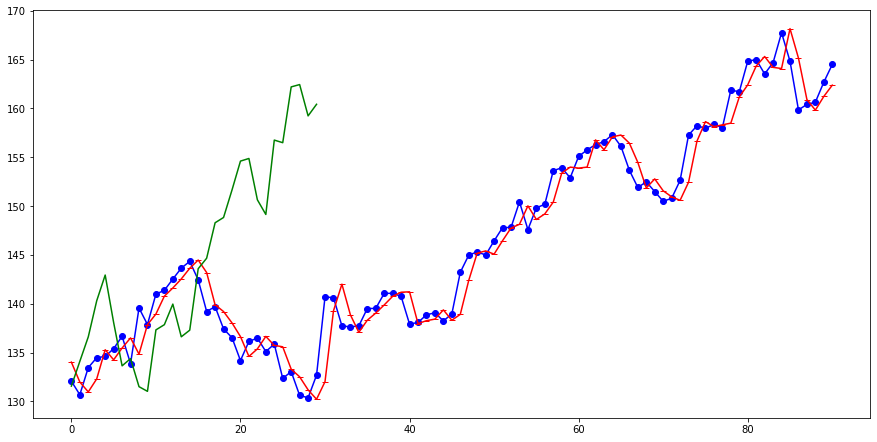

In [62]:
plt.figure(figsize=[15, 7.5])
#actual
plt.plot(test_data, color="blue", marker="o")
#ARIMA
plt.plot(model_predictions, color="red", marker="_")
#MLP
plt.plot(yhat, color="green")
plt.plot(test_data, yhat, color='red', label='Actual Price')
#MA
plt.plot(without_nans, color="black")


In [ ]:

RA_MSE = mean_squared_error(MLP_test, data['pandas_SMA_3'])
print('Mean Squared Error: {}'.format(RA_MSE))

RA_MAE = mean_absolute_error(MLP_test, data['pandas_SMA_3'])
print('Mean Absolute Error: {}'.format(RA_MSE))

RA_error = [MLP_MSE, MLP_MAE]
print(RA_error)




#data['pandas_SMA_3']

In [ ]:
plt.bar(['ARIMA MSE', 'ARIMA MAE'], ARIMA_error)
plt.bar(['MLP_MSE','MLP_MAE'], MLP_error)

plt.ylabel('Error')
plt.title('Mean squared error and mean absolute error comparison')

plt.show()
